<a href="https://colab.research.google.com/github/janel-dsbc/Deep-Dive-Projects/blob/main/Final_SQL_2_BQProject3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Basic Queries
  * SELECT (with * and with column names)
  * WHERE
  * AND
  * OR
  * LIKE (with % or _ wildcard)
  * BETWEEN
  * LIMIT

* Sorting and Grouping
  * ORDER BY
  * DISTINCT
  * GROUP BY

* Aggregates
  * MAX
  * MIN
  * SUM
  * AVG
  * COUNT

- The format is:
    1. A backick (the symbol \`).
    2. The project name. In this case it is `bigquery-public-data`.
    3. A period.
    4. The dataset name. In this case, it is `chicago_taxi_trips`.
    5. A period.
    6. The table name. You used this as your answer in **1) Find the data**.
    7. A backtick (the symbol \`).

bigquery-public-data.fdic_banks

In [ ]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "stackoverflow" dataset
dataset_ref = client.dataset("fdic_banks", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)


# Get a list of available tables
tables = list(client.list_tables(dataset))
list_of_tables = [table.table_id for table in tables] # Your code here

# Print your answer
print(list_of_tables)


Using Kaggle's public dataset BigQuery integration.
['institutions', 'locations']


In [ ]:
# Construct a reference to the  table
table_ref = dataset_ref.table("institutions")

# API request - fetch the table
table = client.get_table(table_ref)


# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

,fdic_certificate_number,institution_name,state_name,fdic_id,docket,active,address,total_assets,bank_charter_class,change_code_1,...,csa_name,csa_fips_code,csa_indicator,cbsa_name,cbsa_fips_code,cbsa_metro_flag,cbsa_micro_flag,cbsa_division_name,cbsa_division_fips_code,cbsa_division_flag
0,21314,The First National Bank of Autauga County,Alabama,14751,0,False,744 East Main Street,NaN,N,223,...,"Montgomery-Selma-Alexander City, AL",388,True,"Montgomery, AL",33860,True,False,None,None,False
1,15722,Baldwin National Bank,Alabama,9984,0,False,Milwaukee And Ohio Streets,NaN,N,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
2,21103,State Bank of the Gulf,Alabama,14586,0,False,West 18th Avenue And Highway 59,NaN,NM,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
3,21466,First National Bank of Alabama-Daphne,Alabama,14846,0,False,2211 Highway 98,NaN,N,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
4,19477,Central Bank of Eufaula,Alabama,13277,0,False,223 East Broad Street,NaN,NM,223,...,None,None,False,"Eufaula, AL-GA",21640,False,True,None,None,False


What is the sum of FDIC's assets?

In [ ]:
query = """
        SELECT AVG(total_assets)
        FROM `bigquery-public-data.fdic_banks.institutions`
        WHERE total_assets > 0
        """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
sum_query = safe_query_job.to_dataframe()



In [ ]:
sum_query

,f0_
0,1.622363e+06


In [ ]:
query = """
        SELECT DISTINCT (state_name), COUNT(1) as count_institutions, last_updated
        FROM `bigquery-public-data.fdic_banks.institutions`
        GROUP BY state_name, last_updated


        """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
sum_query = safe_query_job.to_dataframe()


In [ ]:
sum_query

,state_name,count_institutions,last_updated
0,Alabama,6,1998-12-10
1,Alabama,80,1990-10-04
2,Alabama,19,1998-07-17
3,Alabama,13,1999-05-05
4,Alabama,33,1991-03-07
...,...,...,...
11753,Puerto Rico,1,2020-11-02
11754,Virgin Islands Of The U.S.,1,2017-02-03
11755,Virgin Islands Of The U.S.,1,2008-03-03
11756,Virgin Islands Of The U.S.,1,2022-08-31


In [ ]:
query = """
        SELECT DISTINCT (state_name), COUNT(1) as count_institutions
        FROM `bigquery-public-data.fdic_banks.institutions`
        GROUP BY state_name
        ORDER BY
        count_institutions DESC
        """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
sum_query = safe_query_job.to_dataframe()


In [ ]:
sum_query

,state_name,count_institutions
0,Texas,2814
1,Illinois,1926
2,Florida,1584
3,California,1282
4,Ohio,1006
5,Missouri,1000
6,Minnesota,931
7,Georgia,923
8,Pennsylvania,917
9,Wisconsin,849


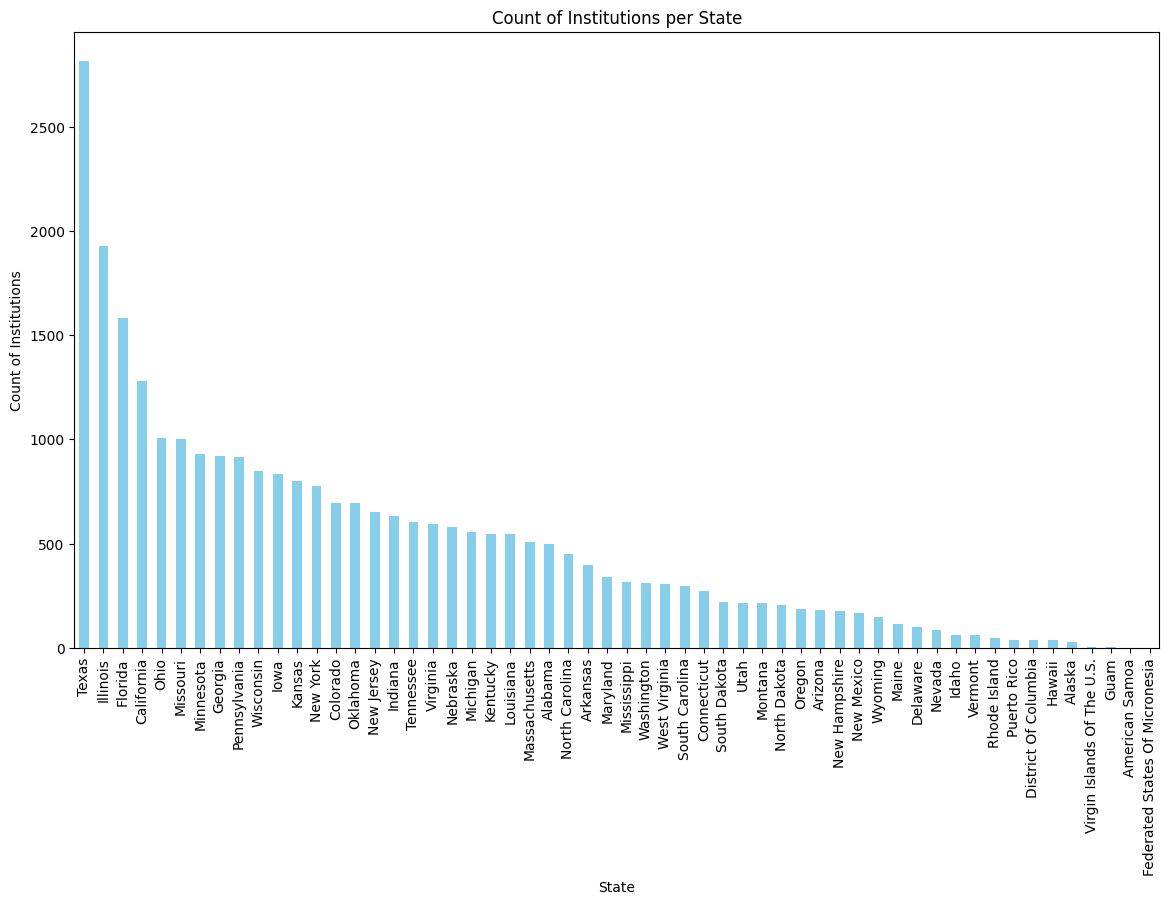

In [ ]:
# Plotting the data
plt.figure(figsize=(14, 8))
sum_query.set_index('state_name')['count_institutions'].plot(kind='bar', color='skyblue')
plt.title('Count of Institutions per State')
plt.xlabel('State')
plt.ylabel('Count of Institutions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
query = """
        SELECT
        institution_name,
        city,
        state,
        total_assets,
        established_date,
        MAX(total_assets) AS max_assets,
        MIN(total_assets) AS min_assets,
        SUM(total_assets) AS sum_assets,
        AVG(total_assets) AS avg_assets,
        COUNT(*) AS count_institutions
        FROM `bigquery-public-data.fdic_banks.institutions`
        WHERE state = 'CA'
            AND established_date BETWEEN '1900-01-01' AND '2000-12-31'
            AND (institution_name LIKE 'Bank%' OR city LIKE '%San%')
        GROUP BY
        institution_name, city, state, total_assets, established_date
        ORDER BY
        total_assets DESC
        LIMIT 10;
        """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
summary_of_data_query = safe_query_job.to_dataframe()




In [ ]:
summary_of_data_query

,institution_name,city,state,total_assets,established_date,max_assets,min_assets,sum_assets,avg_assets,count_institutions
0,Silicon Valley Bank,Santa Clara,CA,211824000,1983-10-17,211824000,211824000,211824000,211824000.0,1
1,"MUFG Union Bank, National Association",San Francisco,CA,124662227,1979-03-09,124662227,124662227,124662227,124662227.0,1
2,California Federal Bank,San Francisco,CA,50680164,1945-01-01,50680164,50680164,50680164,50680164.0,1
3,"Bank of America California, National Association",San Francisco,CA,26568000,1984-05-18,26568000,26568000,26568000,26568000.0,1
4,Comerica Bank-California,San Jose,CA,20881261,1979-07-05,20881261,20881261,20881261,20881261.0,1
5,Union Bank,San Francisco,CA,20537112,1953-02-02,20537112,20537112,20537112,20537112.0,1
6,Bank of Hope,Los Angeles,CA,18083352,1986-03-18,18083352,18083352,18083352,18083352.0,1
7,Axos Bank,San Diego,CA,16002714,2000-07-04,16002714,16002714,16002714,16002714.0,1
8,"First Nationwide Bank, A FSB",San Francisco,CA,14926832,1936-02-01,14926832,14926832,14926832,14926832.0,1
9,"HomeFed Bank, Federal Savings Bank",San Diego,CA,12175590,1934-11-01,12175590,12175590,12175590,12175590.0,1


#Make some plots

In [ ]:
print(summary_of_data_query.columns)


Index(['institution_name', 'city', 'state', 'total_assets', 'established_date',
       'max_assets', 'min_assets', 'sum_assets', 'avg_assets',
       'count_institutions'],
      dtype='object')


In [ ]:
print(summary_of_data_query.head())


                                   institution_name           city state  \
0                               Silicon Valley Bank    Santa Clara    CA   
1             MUFG Union Bank, National Association  San Francisco    CA   
2                           California Federal Bank  San Francisco    CA   
3  Bank of America California, National Association  San Francisco    CA   
4                          Comerica Bank-California       San Jose    CA   

   total_assets established_date  max_assets  min_assets  sum_assets  \
0     211824000       1983-10-17   211824000   211824000   211824000   
1     124662227       1979-03-09   124662227   124662227   124662227   
2      50680164       1945-01-01    50680164    50680164    50680164   
3      26568000       1984-05-18    26568000    26568000    26568000   
4      20881261       1979-07-05    20881261    20881261    20881261   

    avg_assets  count_institutions  
0  211824000.0                   1  
1  124662227.0                   1  

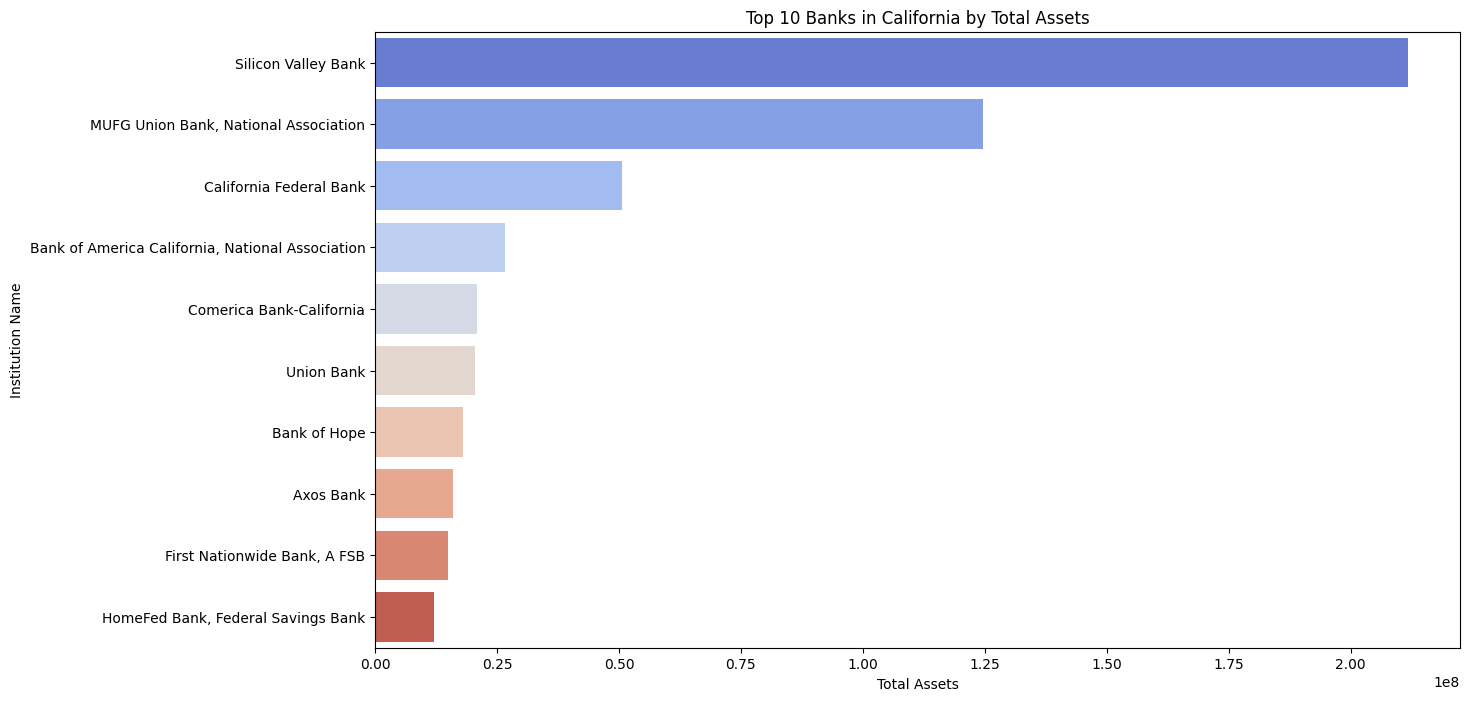

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='total_assets', y='institution_name', data=summary_of_data_query, palette='coolwarm')
plt.title('Top 10 Banks in California by Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Institution Name')
plt.show()

In [ ]:
query = """
        SELECT

        DISTINCT state_name,
        total_assets,
        established_date,
        MAX(total_assets) AS max_assets,
        MIN(total_assets) AS min_assets,
        SUM(total_assets) AS sum_assets,
        AVG(total_assets) AS avg_assets,
        COUNT(*) AS count_institutions
        FROM `bigquery-public-data.fdic_banks.institutions`
        WHERE state = 'CA'
            AND established_date BETWEEN '1900-01-01' AND '2020-11-02'
            AND (institution_name LIKE 'Bank%' OR city LIKE '%San%')
        GROUP BY
        state_name, total_assets, established_date
        ORDER BY
        total_assets DESC
        LIMIT 10;
        """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
summary_of_data_query = safe_query_job.to_dataframe()

In [ ]:
summary_of_data_query

,state_name,total_assets,established_date,max_assets,min_assets,sum_assets,avg_assets,count_institutions
0,California,211824000,1983-10-17,211824000,211824000,211824000,211824000.0,1
1,California,197908327,2010-07-01,197908327,197908327,197908327,197908327.0,1
2,California,190953448,2002-11-05,190953448,190953448,190953448,190953448.0,1
3,California,124662227,1979-03-09,124662227,124662227,124662227,124662227.0,1
4,California,50680164,1945-01-01,50680164,50680164,50680164,50680164.0,1
5,California,26568000,1984-05-18,26568000,26568000,26568000,26568000.0,1
6,California,20881261,1979-07-05,20881261,20881261,20881261,20881261.0,1
7,California,20537112,1953-02-02,20537112,20537112,20537112,20537112.0,1
8,California,18083352,1986-03-18,18083352,18083352,18083352,18083352.0,1
9,California,16002714,2000-07-04,16002714,16002714,16002714,16002714.0,1


In [ ]:
query = """
        WITH state_counts AS (
        SELECT state_name,COUNT(1) AS count_institutions
        FROM
        `bigquery-public-data.fdic_banks.institutions`
        GROUP BY
        state_name
        ),

        detailed_info AS (
        SELECT
        institution_name,
        city,
        state_name AS state,
        total_assets,
        established_date,
        MAX(total_assets) OVER() AS max_assets,
        MIN(total_assets) OVER() AS min_assets,
        SUM(total_assets) OVER() AS sum_assets,
        AVG(total_assets) OVER() AS avg_assets,
        COUNT(*) OVER() AS count_institutions_all
        FROM
        `bigquery-public-data.fdic_banks.institutions`
        WHERE
        established_date BETWEEN '1900-01-01' AND '2000-12-31'
        AND (institution_name LIKE 'Bank%' OR city LIKE '%San%')
        )
SELECT
    d.institution_name,
    d.city,
    d.state,
    d.total_assets,
    d.established_date,
    d.max_assets,
    d.min_assets,
    d.sum_assets,
    d.avg_assets,
    d.count_institutions_all,
    s.count_institutions AS count_institutions_in_state
FROM
    detailed_info d
JOIN
    state_counts s ON d.state = s.state_name
---GROUP BY s.state_name
ORDER BY
    d.total_assets DESC;
    """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
summary_of_data_query = safe_query_job.to_dataframe()


In [ ]:
summary_of_data_query

,institution_name,city,state,total_assets,established_date,max_assets,min_assets,sum_assets,avg_assets,count_institutions_all,count_institutions_in_state
0,"Bank of America, National Association",Charlotte,North Carolina,2.440022e+09,1904-10-17,2440022000,1,4526731469,3.647648e+06,1443,453
1,"Bank of America, National Association",Charlotte,North Carolina,3.229130e+08,1941-04-15,2440022000,1,4526731469,3.647648e+06,1443,453
2,Silicon Valley Bank,Santa Clara,California,2.118240e+08,1983-10-17,2440022000,1,4526731469,3.647648e+06,1443,1282
3,American Express National Bank,Sandy,Utah,1.379221e+08,1989-03-20,2440022000,1,4526731469,3.647648e+06,1443,216
4,"MUFG Union Bank, National Association",San Francisco,California,1.246622e+08,1979-03-09,2440022000,1,4526731469,3.647648e+06,1443,1282
...,...,...,...,...,...,...,...,...,...,...,...
1438,Pacific Coast Bank,San Diego,California,NaN,1973-03-09,2440022000,1,4526731469,3.647648e+06,1443,1282
1439,Bank of Stratford,Stratford,Connecticut,NaN,1971-07-24,2440022000,1,4526731469,3.647648e+06,1443,274
1440,Bank of Pinehurst,Pinehurst,Georgia,NaN,1908-01-01,2440022000,1,4526731469,3.647648e+06,1443,923
1441,Bank of West Jersey,Delran Township,New Jersey,NaN,1903-06-08,2440022000,1,4526731469,3.647648e+06,1443,653


In [ ]:
query = """
        WITH state_counts AS (
        SELECT DISTINCT state_name,COUNT(1) AS count_institutions
        FROM
        `bigquery-public-data.fdic_banks.institutions`
        GROUP BY
        state_name
        ),

        detailed_info AS (
        SELECT
        state_name AS state,
        total_assets,
        established_date,
        MAX(total_assets) OVER() AS max_assets,
        MIN(total_assets) OVER() AS min_assets,
        SUM(total_assets) OVER() AS sum_assets,
        AVG(total_assets) OVER() AS avg_assets,
        COUNT(*) OVER() AS count_institutions_all
        FROM
        `bigquery-public-data.fdic_banks.institutions`
        WHERE
        established_date BETWEEN '1900-01-01' AND '2000-12-31'
        AND (institution_name LIKE 'Bank%' OR city LIKE '%San%')
        )
SELECT
    d.state,
    d.total_assets,
    d.established_date,
    d.max_assets,
    d.min_assets,
    d.sum_assets,
    d.avg_assets,
    d.count_institutions_all,
    s.count_institutions AS count_institutions_in_state
FROM
    detailed_info d
JOIN
    state_counts s ON d.state = s.state_name
ORDER BY
    d.total_assets DESC;
    """

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
summary_of_data_query = safe_query_job.to_dataframe()


In [ ]:
summary_of_data_query

,state,total_assets,established_date,max_assets,min_assets,sum_assets,avg_assets,count_institutions_all,count_institutions_in_state
0,North Carolina,2.440022e+09,1904-10-17,2440022000,1,4526731469,3.647648e+06,1443,453
1,North Carolina,3.229130e+08,1941-04-15,2440022000,1,4526731469,3.647648e+06,1443,453
2,California,2.118240e+08,1983-10-17,2440022000,1,4526731469,3.647648e+06,1443,1282
3,Utah,1.379221e+08,1989-03-20,2440022000,1,4526731469,3.647648e+06,1443,216
4,California,1.246622e+08,1979-03-09,2440022000,1,4526731469,3.647648e+06,1443,1282
...,...,...,...,...,...,...,...,...,...
1438,Washington,NaN,1936-10-08,2440022000,1,4526731469,3.647648e+06,1443,313
1439,Washington,NaN,1965-08-23,2440022000,1,4526731469,3.647648e+06,1443,313
1440,Washington,NaN,1965-08-30,2440022000,1,4526731469,3.647648e+06,1443,313
1441,Massachusetts,NaN,1965-05-17,2440022000,1,4526731469,3.647648e+06,1443,509
